# Car Prices

🎯 The goal of this challenge is to prepare a dataset and apply some feature selection techniques that you have learned so far.

🚗 We are dealing with a dataset about cars and we would like to predict whether a car is expensive or cheap.

In [45]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

In [26]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv"

In [37]:
data = pd.read_csv(url)
data

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952,ohc,four,3.15,5400,expensive
201,turbo,front,68.8,3049,ohc,four,3.15,5300,expensive
202,std,front,68.9,3012,ohcv,six,2.87,5500,expensive
203,turbo,front,68.9,3217,ohc,six,3.40,4800,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to refer to it throughout the exercise.

## (1) Duplicates

❓ Remove the duplicates from the dataset if there are any. ❓

*Overwite the dataframe `df`*

In [38]:
data.duplicated().sum()

14

In [39]:
df = data.drop_duplicates()

## (2) Missing values

❓ Find the missing values and impute them either with `strategy = "most frequent"` (categorical variables) or `strategy = "mean"` (numerical variables) ❓


In [40]:
df.isnull().sum()

aspiration         0
enginelocation    10
carwidth           2
curbweight         0
enginetype         0
cylindernumber     0
stroke             0
peakrpm            0
price              0
dtype: int64

### `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations for missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since missing values make up less than 30% of the data.
</details> 

In [41]:
df['carwidth'].unique()

array(['64.1', '65.5', nan, '66.4', '66.3', '71.4', '67.9', '64.8',
       '66.9', '70.9', '60.3', '*', '63.6', '63.8', '64.6', '63.9', '64',
       '65.2', '66', '61.8', '69.6', '70.6', '64.2', '65.7', '66.5',
       '66.1', '70.3', '71.7', '70.5', '72', '68', '64.4', '65.4', '68.4',
       '68.3', '65', '72.3', '66.6', '63.4', '65.6', '67.7', '67.2',
       '68.9', '68.8'], dtype=object)

In [46]:
df['carwidth'][df['carwidth'] == "*"] = np.nan

In [43]:
df['carwidth'].unique()

array(['64.1', '65.5', nan, '66.4', '66.3', '71.4', '67.9', '64.8',
       '66.9', '70.9', '60.3', '63.6', '63.8', '64.6', '63.9', '64',
       '65.2', '66', '61.8', '69.6', '70.6', '64.2', '65.7', '66.5',
       '66.1', '70.3', '71.7', '70.5', '72', '68', '64.4', '65.4', '68.4',
       '68.3', '65', '72.3', '66.6', '63.4', '65.6', '67.7', '67.2',
       '68.9', '68.8'], dtype=object)

In [47]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") # Instantiate a SimpleImputer object with your strategy of choice

imputer.fit(df[['carwidth']]) # Call the "fit" method on the object

df['carwidth'] = imputer.transform(df[['carwidth']]) # Call the "transform" method on the object

#imputer.statistics_ # The mean is stored in the transformer's memory

### `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is <code>front</code>, impute with the most frequent.
</details>

In [48]:
imputer = SimpleImputer(strategy="most_frequent") # Instantiate a SimpleImputer object with your strategy of choice

imputer.fit(df[['enginelocation']]) # Call the "fit" method on the object

df['enginelocation'] = imputer.transform(df[['enginelocation']]) # Call the "transform" method on the object

#imputer.statistics_ # The mean is stored in the transformer's memory

In [54]:
df.isnull().sum()

aspiration        0
enginelocation    0
carwidth          0
curbweight        0
enginetype        0
cylindernumber    0
stroke            0
peakrpm           0
price             0
dtype: int64

🧪 **Test your code**

In [50]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/eolivio/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/eolivio/code/eolivio/data-car-prices
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_carwidth PASSED   [ 50%]
tests/test_missing_values.py::TestMissing_values::test_engine_location PASSED [100%]

============================== 2 passed in 0.37s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


## (3) Scaling the numerical features

❓ **Question: Scaling the numerical features** ❓

Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scaler
- Standard Scaler

Replace the original columns with the transformed values.

### `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

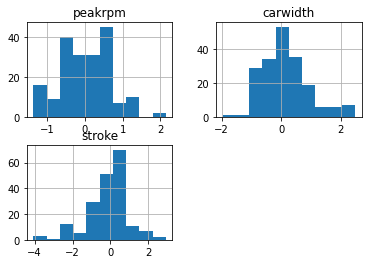

In [61]:
import matplotlib.pyplot as plt

df.hist(column=['peakrpm', 'carwidth', 'stroke'] );

In [104]:
df[['peakrpm', 'carwidth', 'stroke']].histplot()

AttributeError: 'DataFrame' object has no attribute 'histplot'

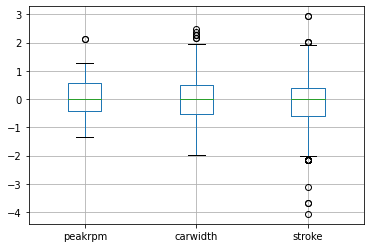

In [62]:
df[['peakrpm', 'carwidth', 'stroke']].boxplot();

In [59]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler() # Instanciate Robust Scaler

r_scaler.fit(df[['peakrpm', 'carwidth', 'stroke']]) # Fit scaler to feature

df['peakrpm'], df['carwidth'], df['stroke'] = r_scaler.fit_transform(df[['peakrpm', 'carwidth', 'stroke']]).T #Scale

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.555556,2548,dohc,four,-2.033333,-0.142857,expensive
2,std,front,-0.037037,2823,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.139339,2337,ohc,four,0.366667,0.571429,expensive
4,std,front,0.296296,2824,ohc,five,0.366667,0.571429,expensive
5,std,front,0.259259,2507,ohc,five,0.366667,0.571429,expensive


### `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

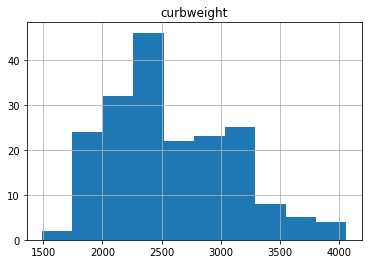

In [63]:
df.hist(column='curbweight');

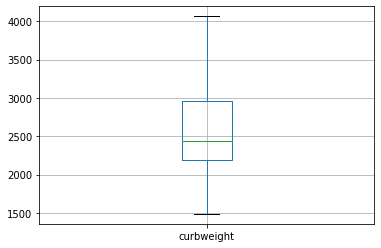

In [64]:
df[['curbweight']].boxplot();

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Instanciate StandarScaler

scaler.fit(df[['curbweight']]) # Fit scaler to data

df['curbweight'] = scaler.transform(df[['curbweight']]) # Use scaler to transform data
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.555556,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,std,front,-0.037037,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.139339,-0.450474,ohc,four,0.366667,0.571429,expensive
4,std,front,0.296296,0.478302,ohc,five,0.366667,0.571429,expensive
5,std,front,0.259259,-0.126260,ohc,five,0.366667,0.571429,expensive


🧪 **Test your code**

In [66]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/eolivio/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/eolivio/code/eolivio/data-car-prices
plugins: anyio-3.4.0
collecting ... collected 4 items

tests/test_scaling.py::TestScaling::test_carwidth PASSED                 [ 25%]
tests/test_scaling.py::TestScaling::test_curbweight PASSED               [ 50%]
tests/test_scaling.py::TestScaling::test_peakrpm PASSED                  [ 75%]
tests/test_scaling.py::TestScaling::test_stroke PASSED                   [100%]

============================== 4 passed in 0.41s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


## (4) Encoding the categorical features

❓ **Question: encoding the categorical variables** ❓

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features with their encoded version(s).

### `aspiration` & `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [69]:
df.aspiration.unique() # Check unique values

array(['std', 'turbo'], dtype=object)

In [76]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instantiate encoder for binary feature

ohe.fit(df[['aspiration']]) # Fit encoder

df['aspiration'] = ohe.fit_transform(df[['aspiration']]) # Encode

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.555556,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,0.0,-0.037037,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,0.0,0.139339,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,0.0,0.296296,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,0.0,0.259259,-0.126260,ohc,five,0.366667,0.571429,expensive


In [73]:
df.enginelocation.unique() # Check unique values

array(['front', 'rear'], dtype=object)

In [77]:
ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instantiate encoder for binary feature

ohe.fit(df[['enginelocation']]) # Fit encoder

df['enginelocation'] = ohe.fit_transform(df[['enginelocation']]) # Encode 

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.555556,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,0.0,-0.037037,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,0.0,0.139339,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,0.0,0.296296,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,0.0,0.259259,-0.126260,ohc,five,0.366667,0.571429,expensive


### `enginetype`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [79]:
data.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [87]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False) # Instantiate OneHotEncoder

ohe.fit(df[['enginetype']]) # Fit OneHotEncoder

ohe.categories_ #see categories

df["dohc"],df["ohcv"],df["ohc"],df["l"],df["rotor"],df["ohcf"], df["dohcv"] = ohe.fit_transform(df[['enginetype']]).T # Transpose back into dataframe

df.drop(columns='enginetype', inplace = True)

df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,ohcv,ohc,l,rotor,ohcf,dohcv
0,0.0,0.0,-0.555556,-0.048068,4,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,-0.037037,0.476395,6,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.139339,-0.450474,4,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,0.478302,5,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.259259,-0.126260,5,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `cylindernumber`

<details>
    <summary>💡 Hint </summary>

ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded.

⚖️ Once that it is encoded between 2 and 12, it has become a numerical feature that you can scale.
</details>

In [88]:
dict_ = {'two' :2, 'three':3, 'four':4, 'five':5,  'six' :6, 'eight':8, 'twelve': 12}
df.cylindernumber = data.cylindernumber.map(dict_)
df.cylindernumber

0      4
2      6
3      4
4      5
5      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 191, dtype: int64

### `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [89]:
from sklearn.preprocessing import LabelEncoder

encoder_price = LabelEncoder()

df['price'] = encoder_price.fit_transform(df['price'])

df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,ohcv,ohc,l,rotor,ohcf,dohcv
0,0.0,0.0,-0.555556,-0.048068,4,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,-0.037037,0.476395,6,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.139339,-0.450474,4,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,0.478302,5,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.259259,-0.126260,5,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


🧪 **Test your code**

In [90]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/eolivio/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/eolivio/code/eolivio/data-car-prices
plugins: anyio-3.4.0
collecting ... collected 4 items

tests/test_encoding.py::TestEncoding::test_aspiration PASSED             [ 25%]
tests/test_encoding.py::TestEncoding::test_enginelocation PASSED         [ 50%]
tests/test_encoding.py::TestEncoding::test_enginetype PASSED             [ 75%]
tests/test_encoding.py::TestEncoding::test_price PASSED                  [100%]

============================== 4 passed in 0.40s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master


## (5) Base Modelling

👏 The dataset has been preprocessed and is now ready to be fitted to a model. 

❓**Question: a first attempt to evaluate a classification model** ❓

Cross-validate a `LogisticRegression` on this preprocessed dataset and save its score under a variable named `base_model_score`.

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['price'])
y = df.price

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()
base_model_score

0.8797368421052632

🧪 **Test your code**

In [94]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/eolivio/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/eolivio/code/eolivio/data-car-prices
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


## (6) Feature Selection

👩🏻‍🏫 A powerful way to detect whether a feature is relevant or not to predict a target is to:
1. Run a model and score it
2. Shuffle this feature, re-run the model and score it
    - If the performance significantly dropped, the feature is important and you shoudn't have dropped it
    - If the performance didn't decrease a lot, the feature may be discarded.

❓ **Questions** ❓

1. Perform a feature permutation to detect which features bring the least amount of information to the model. 
2. Remove the weak features from your dataset.
3. Using your new set of strong features, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [96]:
from sklearn.inspection import permutation_importance

log_model = LogisticRegression().fit(X, y)

permutation_score = permutation_importance(log_model, X, y, n_repeats=10) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

,feature,score decrease
3,curbweight,0.294764
2,carwidth,0.12199
5,stroke,0.034555
6,peakrpm,0.018325
11,rotor,0.017277
10,l,0.013613
13,dohcv,0.012042
0,aspiration,0.010471
7,dohc,0.005236
4,cylindernumber,0.005236


In [102]:
X_ = df.drop(columns=['price', 'ohc', 'ohcv', 'enginelocation', 'ohcf', 'cylindernumber', 'dohc'])
y_ = df.price

model = LogisticRegression()

scores = cross_val_score(model, X_, y_, cv=10)

strong_model_score = scores.mean()
strong_model_score

0.8797368421052632

🧪 **Test your code**

In [103]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/eolivio/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/eolivio/code/eolivio/data-car-prices
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_strong_model.py::TestStrong_model::test_strong_model_score PASSED [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/strong_model.pickle

git commit -m 'Completed strong_model step'

git push origin master


🏁 Congratulations! You have prepared a whole dataset and ran some feature selection on it 💪

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!